In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns",None)
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.metrics import mean_squared_error
from scipy import stats
import os

# Cargando el archivo
 1. Pasar la carpeta compartida "PREP" a la carpeta de "Colab Notebooks"

In [2]:
main = pd.read_excel("Files/Data/ComputoGobernador2015_Casilla (1).xlsx", sheet_name = "POR CASILLA", skiprows=1,skipfooter=1) # Alexis
file = main
file['VOTOS NULOS'] = pd.to_numeric(file['VOTOS NULOS'], errors='coerce')
file = file.fillna(0)
file.head(20)

,DISTRITO LOCAL,MUNICIPIO,SECCION,CASILLA,PAN,PRI,PRD,PVEM,PT,PANAL,MORENA,HUMANISTA,ENCUENTRO SOCIAL,PRI-PVEM-PANAL,PRI-PVEM,PRI-PANAL,PVEM-PANAL,TOTAL COALICIÓN,CANDIDATO NO REGISTRADO,VOTOS NULOS,TOTAL VOTOS VALIDOS,VOTACION TOTAL EMITIDA
0,CANANEA VI,ACONCHI,1,BASICA,163,198,0,1,2,9,10,0,0,1,3,5,0,217,0,7.0,392,399
1,CANANEA VI,ACONCHI,1,CONTIGUA 1,194,174,2,1,0,7,6,0,0,6,3,7,0,198,0,5.0,400,405
2,CANANEA VI,ACONCHI,1,CONTIGUA 2,181,183,1,2,0,7,12,1,2,3,1,4,0,200,0,11.0,397,408
3,CANANEA VI,ACONCHI,2,BASICA,162,113,5,0,0,4,5,0,0,6,3,3,1,130,0,3.0,302,305
4,CANANEA VI,ACONCHI,2,CONTIGUA 1,167,122,6,0,2,0,2,0,0,6,3,0,0,131,0,3.0,308,311
5,AGUA PRIETA VII,AGUA PRIETA,3,BASICA,207,78,4,2,5,21,0,2,1,7,1,3,0,112,0,9.0,331,340
6,AGUA PRIETA VII,AGUA PRIETA,3,CONTIGUA 1,204,80,1,3,3,28,1,1,1,9,0,0,0,120,0,0.0,331,331
7,AGUA PRIETA VII,AGUA PRIETA,4,BASICA,105,40,4,1,5,13,3,3,0,3,2,2,0,61,0,3.0,181,184
8,AGUA PRIETA VII,AGUA PRIETA,5,BASICA,183,80,5,3,8,15,4,1,0,15,3,7,0,123,0,0.0,324,324
9,AGUA PRIETA VII,AGUA PRIETA,6,BASICA,173,75,4,0,6,0,4,3,0,33,0,0,0,108,0,4.0,298,302


# Obteniendo propocion de casillas por distrito

In [3]:
# size = file[["DISTRITO LOCAL", "CASILLA", "VOTACION TOTAL EMITIDA"]]
# size["CASILLA"] = 1
# size = size.groupby(by = "DISTRITO LOCAL").sum()
# size = size.reset_index()
# size["VOTOS POR CASILLA"] = (size["VOTACION TOTAL EMITIDA"] / size["CASILLA"])
# size["REPRESENTACION"] = (size["VOTOS POR CASILLA"]*100)/size["VOTOS POR CASILLA"].sum()
# size["MUESTRA"] = round((size["REPRESENTACION"]*370)/100)
# size = size[["DISTRITO LOCAL", "MUESTRA"]]
# size = size.groupby(by = "DISTRITO LOCAL").sum()
# print(size)
# size_dic = size.to_dict()
# size_dic = size_dic["MUESTRA"]

#porcentaje = .25



size_dic = {'AGUA PRIETA VII  ': 17.0,
 'CABORCA III  ': 17.0,
 'CANANEA VI   ': 17.0,
 'EMPALME XIV  ': 15.0,
 'ETCHOJOA XX   ': 18.0,
 'GUAYMAS XIII ': 18.0,
 'HERMOSILLO CENTRO IX   ': 19.0,
 'HERMOSILLO COSTA XI   ': 23.0,
 'HERMOSILLO NORESTE X    ': 19.0,
 'HERMOSILLO NOROESTE VIII ': 23.0,
 'HERMOSILLO SUR XII  ': 19.0,
 'HUATABAMPO XXI  ': 14.0,
 'NAVOJOA NORTE XIX  ': 15.0,
 'NOGALES NORTE IV   ': 12.0,
 'NOGALES SUR V    ': 23.0,
 'OBREGON CENTRO XVII ': 17.0,
 'OBREGON NORTE XVIII': 16.0,
 'OBREGON SUR XV   ': 16.0,
 'OBREGON SURESTE XVI  ': 16.0,
 'PUERTO PEÑASCO II   ': 22.0,
 'SAN LUIS RIO COLORADO I    ': 14.0}

#for key, value in size_dic.items():
#    size_dic[key] = round(value * porcentaje)
#size_dic

In [4]:
for x in range(1,16):
  # Crear dataframe muestra
  muestra = pd.DataFrame()
  # Crear dataframe muestra distritos
  muestra_distritos = pd.DataFrame()
  for dis in size_dic.items():
    total_distrito = file[file["DISTRITO LOCAL"] == dis[0]].iloc[:,:]
    # obtener muestra por distrito
    muestra_dis = total_distrito.sample(int(dis[1]))
    m1 = muestra_dis.iloc[:, 4:]
    cociente = len(total_distrito)/len(m1)
    suma_dis = cociente*(m1.sum())
    # agregamos a nuestros dataframes de la simulacion actual
    muestra_distritos = muestra_distritos.append(suma_dis, ignore_index = True)
    # agregamos la muestra con todos los datos
    muestra = muestra.append(muestra_dis, ignore_index = True)

In [5]:
muestra = muestra.sample(92)
muestra

,DISTRITO LOCAL,MUNICIPIO,SECCION,CASILLA,PAN,PRI,PRD,PVEM,PT,PANAL,MORENA,HUMANISTA,ENCUENTRO SOCIAL,PRI-PVEM-PANAL,PRI-PVEM,PRI-PANAL,PVEM-PANAL,TOTAL COALICIÓN,CANDIDATO NO REGISTRADO,VOTOS NULOS,TOTAL VOTOS VALIDOS,VOTACION TOTAL EMITIDA
315,OBREGON SUR XV,CAJEME,906,BASICA,71,105,6,6,3,6,12,3,3,0,0,0,0,117,0,0.0,215,215
212,HUATABAMPO XXI,HUATABAMPO,1199,CONTIGUA 2,162,195,15,2,0,3,3,0,0,2,3,0,0,205,0,6.0,385,391
114,HERMOSILLO CENTRO IX,HERMOSILLO,462,BASICA,184,136,14,2,11,6,8,2,3,6,2,4,4,160,0,10.0,382,392
71,ETCHOJOA XX,ETCHOJOA,1171,CONTIGUA 1,161,187,16,1,1,7,3,0,0,1,1,1,0,198,0,4.0,379,383
360,SAN LUIS RIO COLORADO I,SAN LUIS RIO COLORADO,706,BASICA,111,78,2,5,0,2,9,5,7,0,1,0,0,86,0,8.0,220,228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,EMPALME XIV,BACUM,766,CONTIGUA 1,76,146,35,0,6,0,4,1,0,0,0,0,0,146,1,4.0,268,273
267,NOGALES SUR V,NOGALES,1434,BASICA,101,107,6,3,7,6,7,7,7,0,0,0,0,116,1,5.0,251,257
143,HERMOSILLO COSTA XI,HERMOSILLO,545,CONTIGUA 1,148,136,10,1,4,1,10,4,5,5,7,0,0,150,0,9.0,331,340
235,NOGALES NORTE IV,NOGALES,175,CONTIGUA 1,99,93,9,6,4,1,2,3,4,1,1,0,1,103,0,9.0,224,233



1. Obtener proporcion de votos reales
2. Crear dataframe para guardar las simulaciones

Valor de Z = 2.57 o 1.96

In [6]:
# Obtener proporcion real
proporcion_real = file.iloc[:, 4:].sum()
proporcion_real = (proporcion_real)/proporcion_real["VOTACION TOTAL EMITIDA"]
# Crear dataframe para almacenar simulaciones
# almacenando la proporcion real como valor inicial
sim = pd.DataFrame()
sim = sim.append(proporcion_real, ignore_index = True)

# Declara el DataFrame de varianzas
varianzas = pd.DataFrame()
for x in range(1,15):
  # Crear dataframe muestra
  muestra = pd.DataFrame()
  # Crear dataframe muestra distritos
  muestra_distritos = pd.DataFrame()
  for dis in size_dic.items():
    total_distrito = file[file["DISTRITO LOCAL"] == dis[0]].iloc[:,:]
    # obtener muestra por distrito
    muestra_dis = total_distrito.sample(int(dis[1]))
    m1 = muestra_dis.iloc[:, 4:]
    cociente = len(total_distrito)/len(m1)
    suma_dis = cociente*(m1.sum())
    # agregamos a nuestros dataframes de la simulacion actual
    muestra_distritos = muestra_distritos.append(suma_dis, ignore_index = True)
    # agregamos la muestra con todos los datos
    muestra = muestra.append(muestra_dis, ignore_index = True)

  muestra = muestra.sample(92)
    
  # calculamos la proporcion de la simulacion
  X_gorro = muestra_distritos.sum()["VOTACION TOTAL EMITIDA"]
  # Una Y__gorro por partido
  Y_gorros = muestra_distritos.sum()
  suma = Y_gorros / X_gorro
  sim = sim.append(suma, ignore_index = True)

  # Calculamos la varianza
  varianza_distritos = pd.DataFrame()
  for dis in size_dic.items():
    total_distrito = file[file["DISTRITO LOCAL"] == dis[0]].iloc[:,:]
    tmp_dis_varianza = muestra[muestra["DISTRITO LOCAL"] == dis[0]].iloc[:,4:]
    Nh = len(total_distrito)
    nh = dis[1]

    tmp_var = pd.DataFrame()
    for index, row in tmp_dis_varianza.iterrows():
      G_hi = (row - (suma * row["VOTACION TOTAL EMITIDA"])) / X_gorro
      tmp_var = tmp_var.append(G_hi, ignore_index = True)
    
    # Calculamos las Gh
    G_h = tmp_var.sum()/nh
    # Data frame para guardar la resta al cuadrado de las (Ghi - Gh)^2
    tmp_var_square = pd.DataFrame()
    for index, row in tmp_var.iterrows():
      sub_square_tmp = (row - G_h) ** 2
      tmp_var_square = tmp_var_square.append(sub_square_tmp, ignore_index = True)
    
    var_Ghi = tmp_var_square.sum()/(dis[1] - 1)
    var_distrito = (Nh ** 2) * ((1/nh) - (1/Nh)) * var_Ghi
    varianza_distritos = varianza_distritos.append(var_distrito, ignore_index = True)

  varianzas = varianzas.append(varianza_distritos.sum(), ignore_index = True)


### Simulaciones 

Nota: el indice 0 o primer renglon es el real


In [7]:
sim

,CANDIDATO NO REGISTRADO,ENCUENTRO SOCIAL,HUMANISTA,MORENA,PAN,PANAL,PRD,PRI,PRI-PANAL,PRI-PVEM,PRI-PVEM-PANAL,PT,PVEM,PVEM-PANAL,TOTAL COALICIÓN,TOTAL VOTOS VALIDOS,VOTACION TOTAL EMITIDA,VOTOS NULOS
0,0.000706,0.010340,0.007224,0.028041,0.406287,0.016054,0.033804,0.430485,0.002418,0.006939,0.007776,0.014901,0.011955,0.000238,0.475866,0.976463,1.0,0.022831
1,0.000738,0.009939,0.006667,0.029013,0.408977,0.015950,0.033967,0.430051,0.001950,0.006478,0.006556,0.015626,0.011646,0.000199,0.472831,0.977022,1.0,0.022240
2,0.000621,0.011144,0.007091,0.029504,0.407588,0.017197,0.031974,0.430315,0.002373,0.006399,0.007024,0.014997,0.012314,0.000049,0.475671,0.977970,1.0,0.021409
3,0.000637,0.010857,0.006856,0.027423,0.407726,0.018638,0.035521,0.429840,0.002378,0.006658,0.006994,0.013563,0.011372,0.000319,0.476199,0.978146,1.0,0.021217
4,0.000945,0.011151,0.007534,0.028649,0.402842,0.019419,0.034379,0.428635,0.002431,0.007009,0.007085,0.015211,0.011717,0.000176,0.476473,0.976239,1.0,0.022816
5,0.000746,0.010145,0.007105,0.027751,0.410024,0.016483,0.032406,0.426910,0.002394,0.007261,0.007848,0.014347,0.013440,0.000251,0.474588,0.976365,1.0,0.022888
6,0.000767,0.011135,0.007699,0.028080,0.408747,0.015749,0.032916,0.429613,0.002185,0.006892,0.007425,0.014278,0.011078,0.000211,0.473153,0.976009,1.0,0.023224
7,0.000513,0.010671,0.007626,0.027071,0.410295,0.013849,0.033301,0.430080,0.002117,0.007434,0.006394,0.015063,0.012483,0.000334,0.472691,0.976719,1.0,0.022768
8,0.000592,0.009721,0.007142,0.028208,0.410510,0.017880,0.033984,0.425465,0.002690,0.006660,0.008029,0.015263,0.011196,0.000365,0.472285,0.977114,1.0,0.022295
9,0.000714,0.010338,0.006597,0.028196,0.403483,0.017201,0.036004,0.426856,0.002494,0.006584,0.008870,0.016258,0.012199,0.000190,0.474395,0.975271,1.0,0.024016


### Varianzas 


In [8]:
varianzas

,CANDIDATO NO REGISTRADO,ENCUENTRO SOCIAL,HUMANISTA,MORENA,PAN,PANAL,PRD,PRI,PRI-PANAL,PRI-PVEM,PRI-PVEM-PANAL,PT,PVEM,PVEM-PANAL,TOTAL COALICIÓN,TOTAL VOTOS VALIDOS,VOTACION TOTAL EMITIDA,VOTOS NULOS
0,1.177346e-09,4.842626e-08,2.307025e-08,2.413338e-07,0.000005,7.842219e-08,5.885808e-07,0.000006,1.674535e-08,3.764668e-08,2.969282e-08,5.989762e-08,1.741721e-07,5.208892e-10,0.000005,9.586906e-08,0.0,9.801321e-08
1,1.057796e-09,5.925816e-08,2.430472e-08,2.891970e-07,0.000005,3.085080e-07,4.202958e-07,0.000006,1.910010e-08,3.181436e-08,4.987157e-07,1.472712e-07,3.640390e-07,9.345510e-13,0.000006,8.486810e-08,0.0,8.350932e-08
2,1.063768e-09,5.437419e-08,2.587681e-08,1.926074e-07,0.000005,1.109897e-06,7.688642e-07,0.000005,1.963824e-08,1.756949e-08,4.601739e-08,6.348842e-08,5.939975e-08,7.810555e-10,0.000004,7.170853e-08,0.0,7.039252e-08
3,2.285548e-09,5.231388e-08,3.291404e-08,2.591673e-07,0.000006,1.976762e-06,1.049259e-06,0.000007,1.444999e-08,2.541431e-08,4.340052e-08,6.078614e-08,7.592534e-08,2.743401e-10,0.000008,8.377617e-08,0.0,7.869309e-08
4,9.430621e-10,4.364918e-08,2.543762e-08,3.385583e-07,0.000005,8.292114e-07,4.947352e-07,0.000006,1.361102e-08,3.986654e-08,5.981631e-08,7.188475e-08,6.874967e-08,2.116217e-10,0.000006,9.218790e-08,0.0,8.879625e-08
5,4.036634e-09,6.297511e-08,3.020517e-08,2.062493e-07,0.000005,1.020263e-07,5.420432e-07,0.000006,6.865832e-09,3.114655e-08,4.133583e-08,5.921545e-08,4.924523e-08,3.069310e-10,0.000006,7.250520e-08,0.0,7.503209e-08
6,8.312720e-10,6.887921e-08,2.246381e-08,2.927654e-07,0.000009,6.418101e-08,1.345003e-06,0.000011,1.333134e-08,3.888709e-08,8.941336e-08,4.971538e-08,5.515804e-07,1.526199e-08,0.000010,1.377523e-07,0.0,1.355767e-07
7,7.881954e-10,4.185735e-08,2.632276e-08,2.166774e-07,0.000004,1.591269e-07,7.082178e-07,0.000004,2.311832e-08,2.798966e-08,5.269629e-08,4.937632e-08,4.618660e-08,9.126273e-10,0.000003,8.177087e-08,0.0,8.196822e-08
8,1.341362e-09,6.391150e-08,2.234655e-08,3.777382e-07,0.000006,3.673825e-07,8.238347e-07,0.000007,2.327620e-08,3.498977e-08,3.045558e-08,8.972073e-08,3.202140e-08,2.123161e-09,0.000007,1.035305e-07,0.0,1.009186e-07
9,6.944048e-09,3.431048e-08,3.507015e-08,2.257573e-07,0.000004,1.261631e-07,6.801596e-07,0.000004,1.024413e-08,3.977262e-08,4.796860e-08,9.657127e-08,2.445856e-07,6.860762e-10,0.000003,7.881586e-08,0.0,8.128733e-08


### Deltas a 2.57


In [9]:
delta = 2.575 * (varianzas ** (1/2))
delta

,CANDIDATO NO REGISTRADO,ENCUENTRO SOCIAL,HUMANISTA,MORENA,PAN,PANAL,PRD,PRI,PRI-PANAL,PRI-PVEM,PRI-PVEM-PANAL,PT,PVEM,PVEM-PANAL,TOTAL COALICIÓN,TOTAL VOTOS VALIDOS,VOTACION TOTAL EMITIDA,VOTOS NULOS
0,0.000088,0.000567,0.000391,0.001265,0.005672,0.000721,0.001976,0.006333,0.000333,0.000500,0.000444,0.000630,0.001075,0.000059,0.005974,0.000797,0.0,0.000806
1,0.000084,0.000627,0.000401,0.001385,0.005949,0.001430,0.001669,0.006490,0.000356,0.000459,0.001818,0.000988,0.001554,0.000002,0.006310,0.000750,0.0,0.000744
2,0.000084,0.000600,0.000414,0.001130,0.005467,0.002713,0.002258,0.005604,0.000361,0.000341,0.000552,0.000649,0.000628,0.000072,0.004855,0.000690,0.0,0.000683
3,0.000123,0.000589,0.000467,0.001311,0.006127,0.003620,0.002638,0.006787,0.000310,0.000411,0.000536,0.000635,0.000710,0.000043,0.007176,0.000745,0.0,0.000722
4,0.000079,0.000538,0.000411,0.001498,0.005927,0.002345,0.001811,0.006407,0.000300,0.000514,0.000630,0.000690,0.000675,0.000037,0.006430,0.000782,0.0,0.000767
5,0.000164,0.000646,0.000448,0.001169,0.005742,0.000822,0.001896,0.006345,0.000213,0.000454,0.000524,0.000627,0.000571,0.000045,0.006311,0.000693,0.0,0.000705
6,0.000074,0.000676,0.000386,0.001393,0.007788,0.000652,0.002986,0.008522,0.000297,0.000508,0.000770,0.000574,0.001912,0.000318,0.008187,0.000956,0.0,0.000948
7,0.000072,0.000527,0.000418,0.001199,0.005000,0.001027,0.002167,0.004853,0.000392,0.000431,0.000591,0.000572,0.000553,0.000078,0.004600,0.000736,0.0,0.000737
8,0.000094,0.000651,0.000385,0.001583,0.006059,0.001561,0.002337,0.006769,0.000393,0.000482,0.000449,0.000771,0.000461,0.000119,0.006606,0.000829,0.0,0.000818
9,0.000215,0.000477,0.000482,0.001223,0.005441,0.000915,0.002124,0.005040,0.000261,0.000514,0.000564,0.000800,0.001273,0.000067,0.004805,0.000723,0.0,0.000734


In [10]:
# Tomamos solo ciertas columnas de nuestra simulacion
sim = sim[["TOTAL COALICIÓN", "PAN","PRD","PT","MORENA","HUMANISTA","ENCUENTRO SOCIAL","CANDIDATO NO REGISTRADO"]]

In [11]:
# Calculamos el error cuadratico medio
ERM = []
for x in sim.columns:
    Y_true = [sim[x].iloc[0] for i in range(len(sim)-1)]
    Y_pred = list(sim[x].iloc[1:])
    error = mean_squared_error(Y_true,Y_pred)
    temp = {"partido":x,"error":error}
    ERM.append(temp)

#### Distrito (18)

[{'partido': 'TOTAL COALICIÓN', 'error': 5.101395693838349e-06},
 {'partido': 'PAN', 'error': 7.034924356906077e-06},
 {'partido': 'PRD', 'error': 3.681516766935599e-06},
 {'partido': 'PT', 'error': 4.758778117960938e-07},
 {'partido': 'MORENA', 'error': 7.782594550447162e-07},
 {'partido': 'HUMANISTA', 'error': 1.142401944198824e-07},
 {'partido': 'ENCUENTRO SOCIAL', 'error': 3.100691532950999e-07},
 {'partido': 'CANDIDATO NO REGISTRADO', 'error': 1.848221561744581e-08}]

<AxesSubplot:>

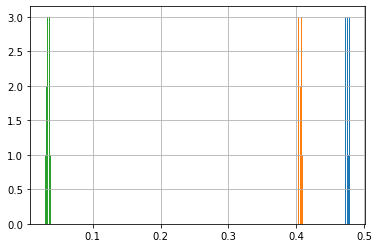

In [13]:
sim['TOTAL COALICIÓN'].hist()
# plt.show()
sim['PAN'].hist()
# plt.show()
sim['PRD'].hist()

<AxesSubplot:>

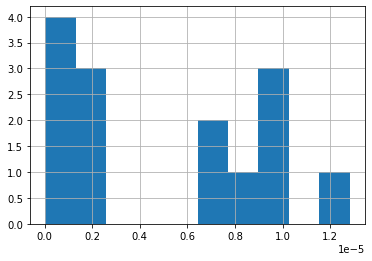

In [14]:
ERR_DISTRITO = []
for i in range(1,15):
    Y_true = sim['TOTAL COALICIÓN'].iloc[0]
    Y_pred = sim['TOTAL COALICIÓN'].iloc[i]
    error = pow((Y_true - Y_pred),2)
    ERR_DISTRITO.append(error)

ERR_DISTRITO = pd.Series(ERR_DISTRITO)
ERR_DISTRITO.hist()

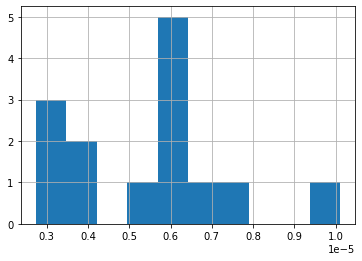

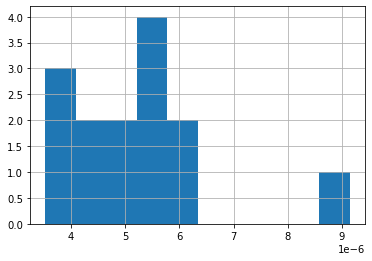

In [15]:
varianzas['TOTAL COALICIÓN'].hist()
plt.show()
varianzas['PAN'].hist()
plt.show()

In [16]:
verdad_pan = sim["PAN"].iloc[0]
print(verdad_pan)
intervalo_PAN = pd.DataFrame({"estimacion": sim["PAN"][1:].array, "delta": delta["PAN"].array})
intervalo_PAN["minimo"] = intervalo_PAN["estimacion"] - intervalo_PAN["delta"]
intervalo_PAN["maximo"] = intervalo_PAN["estimacion"] + intervalo_PAN["delta"]
intervalo_PAN["verdad"] = np.where((intervalo_PAN["minimo"] <= verdad_pan) & (verdad_pan <= intervalo_PAN["maximo"]), True, False)
intervalo_PAN.describe()

0.4062866468610742


,estimacion,delta,minimo,maximo
count,14.000000,14.000000,14.000000,14.000000
mean,0.407242,0.005842,0.401400,0.413084
std,0.002568,0.000746,0.002508,0.002830
min,0.402842,0.004834,0.396714,0.407896
25%,0.406397,0.005448,0.400717,0.411675
50%,0.407630,0.005835,0.401935,0.413526
75%,0.408919,0.006110,0.402880,0.414609
max,0.410510,0.007788,0.405510,0.418083


In [17]:
intervalo_PAN

,estimacion,delta,minimo,maximo,verdad
0,0.408977,0.005672,0.403305,0.414648,True
1,0.407588,0.005949,0.401639,0.413537,True
2,0.407726,0.005467,0.402259,0.413193,True
3,0.402842,0.006127,0.396714,0.408969,True
4,0.410024,0.005927,0.404097,0.415951,True
5,0.408747,0.005742,0.403005,0.414489,True
6,0.410295,0.007788,0.402507,0.418083,True
7,0.410510,0.005000,0.405510,0.415510,True
8,0.403483,0.006059,0.397424,0.409543,True
9,0.407673,0.005441,0.402231,0.413114,True


In [18]:
intervalo_PAN["verdad"].value_counts()

True    14
Name: verdad, dtype: int64

In [19]:
verdad_coalicion = sim["TOTAL COALICIÓN"].iloc[0]
print(verdad_coalicion)
intervalo_COALICION = pd.DataFrame({"estimacion": sim["TOTAL COALICIÓN"][1:].array, "delta": delta["TOTAL COALICIÓN"].array})
intervalo_COALICION["minimo"] = intervalo_COALICION["estimacion"] - intervalo_COALICION["delta"]
intervalo_COALICION["maximo"] = intervalo_COALICION["estimacion"] + intervalo_COALICION["delta"]
intervalo_COALICION["verdad"] = np.where((intervalo_COALICION["minimo"] <= verdad_coalicion) & (verdad_coalicion <= intervalo_COALICION["maximo"]), True, False)

0.4758658431709796


In [20]:
intervalo_COALICION

,estimacion,delta,minimo,maximo,verdad
0,0.472831,0.005974,0.466858,0.478805,True
1,0.475671,0.006310,0.469362,0.481981,True
2,0.476199,0.004855,0.471344,0.481055,True
3,0.476473,0.007176,0.469297,0.483649,True
4,0.474588,0.006430,0.468158,0.481018,True
5,0.473153,0.006311,0.466842,0.479465,True
6,0.472691,0.008187,0.464504,0.480879,True
7,0.472285,0.004600,0.467686,0.476885,True
8,0.474395,0.006606,0.467789,0.481001,True
9,0.479052,0.004805,0.474247,0.483857,True


In [21]:
intervalo_COALICION["verdad"].value_counts()

True    14
Name: verdad, dtype: int64

In [22]:
verdad_PRD = sim["PRD"].iloc[0]
print(verdad_PRD)
intervalo_PRD = pd.DataFrame({"estimacion": sim["PRD"][1:].array, "delta": delta["PRD"].array})
intervalo_PRD["minimo"] = intervalo_PRD["estimacion"] - intervalo_PRD["delta"]
intervalo_PRD["maximo"] = intervalo_PRD["estimacion"] + intervalo_PRD["delta"]
intervalo_PRD["verdad"] = np.where((intervalo_PRD["minimo"] <= verdad_PRD) & (verdad_PRD <= intervalo_PRD["maximo"]), True, False)

0.03380404190446407


In [23]:
# -------

mp = main.sample(round(main.shape[0]*.90)) #<---- PORCENTAJE ----------- <<<<<
mp = mp.groupby("DISTRITO LOCAL").sum()
mp.reset_index(inplace = True)
mp = mp[["DISTRITO LOCAL", "VOTACION TOTAL EMITIDA"]]

In [24]:
dl = pd.read_excel("Files/Data/Votacion.xlsx")
dl

,NOMBRE,CODIGO,VOTOS,LISTA
0,SAN LUIS RIO COLORADO I,D01,0,33287
1,PUERTO PEÑASCO II,D02,0,50461
2,CABORCA III,D03,0,51244
3,NOGALES NORTE IV,D04,0,28421
4,NOGALES SUR V,D05,0,53195
5,CANANEA VI,D06,0,55445
6,AGUA PRIETA VII,D07,0,51461
7,HERMOSILLO NOROESTE VIII,D08,0,57196
8,HERMOSILLO CENTRO IX,D09,0,60790
9,HERMOSILLO NORESTE X,D10,0,53676


In [25]:
for index, row in mp.iterrows():
    dl.loc[dl["NOMBRE"] == row["DISTRITO LOCAL"], "VOTOS"] = row["VOTACION TOTAL EMITIDA"]
dl["PORCENTAJE"] = dl["VOTOS"]/dl["LISTA"]

In [26]:
dl

,NOMBRE,CODIGO,VOTOS,LISTA,PORCENTAJE
0,SAN LUIS RIO COLORADO I,D01,28288,33287,0.849821
1,PUERTO PEÑASCO II,D02,46464,50461,0.920790
2,CABORCA III,D03,46609,51244,0.909550
3,NOGALES NORTE IV,D04,25344,28421,0.891735
4,NOGALES SUR V,D05,48086,53195,0.903957
5,CANANEA VI,D06,48898,55445,0.881919
6,AGUA PRIETA VII,D07,47339,51461,0.919901
7,HERMOSILLO NOROESTE VIII,D08,49639,57196,0.867875
8,HERMOSILLO CENTRO IX,D09,55552,60790,0.913835
9,HERMOSILLO NORESTE X,D10,46688,53676,0.869811


In [27]:
import fiona
fiona.drvsupport.supported_drivers['libkml'] = 'rw'
fiona.drvsupport.supported_drivers['LIBKML'] = 'rw'
gdl = gpd.read_file("Files/Poly/DISTRITOS_SONORA.kml")
gdl = gdl[["Name", "geometry"]]
gdl = gdl.sort_values("Name").reset_index(drop=True)
gdl["Porcentaje"] = 0.0
#gdl

/Users/josetopete/miniconda3/envs/macrodata/lib/python3.9/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [28]:
for index, row in dl.iterrows():
    gdl.loc[gdl["Name"] == row["CODIGO"], "Porcentaje"] = row["PORCENTAJE"]

In [29]:
str(gdl["Name"].iloc[19:])

'19    D20\n20    D21\nName: Name, dtype: object'

In [30]:
gdl

,Name,geometry,Porcentaje
0,D01,"MULTIPOLYGON Z (((-114.74907 32.47515 0.00000,...",0.849821
1,D02,"MULTIPOLYGON Z (((-114.79498 32.42485 0.00000,...",0.920790
2,D03,"MULTIPOLYGON Z (((-113.51349 32.09552 0.00000,...",0.909550
3,D04,"MULTIPOLYGON Z (((-111.22703 31.38073 0.00000,...",0.891735
4,D05,"MULTIPOLYGON Z (((-110.95440 31.30058 0.00000,...",0.903957
5,D06,"MULTIPOLYGON Z (((-111.02231 29.08180 0.00000,...",0.881919
6,D07,"MULTIPOLYGON Z (((-108.80870 31.33288 0.00000,...",0.919901
7,D08,"MULTIPOLYGON Z (((-110.99719 29.15680 0.00000,...",0.867875
8,D09,"MULTIPOLYGON Z (((-110.99238 29.12435 0.00000,...",0.913835
9,D10,"MULTIPOLYGON Z (((-110.99719 29.15680 0.00000,...",0.869811


(-115.37998350993857,
 -108.12282184908463,
 25.993875897010465,
 32.802964736694264)

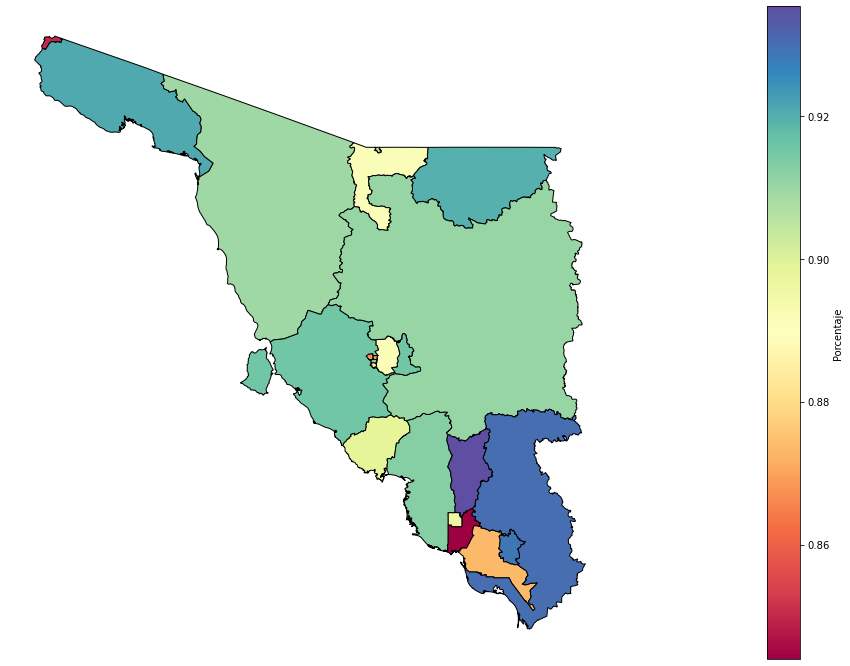

In [35]:
fig, ax = plt.subplots(1, 1,figsize=(20,12))

divider = make_axes_locatable(ax)

#cax = divider.append_axes("right", size="5%", pad=0.1)

gdl.plot(figsize=(20, 20),
         edgecolor = "black",
         column="Porcentaje",
         ax=ax,
         legend=True,
         cmap="Spectral",
         legend_kwds={'label': "Porcentaje",
                      'orientation': "vertical"})

plt.axis("off")

In [61]:
mf = pd.read_csv("Files/Data/Muestra_Final.csv", encoding="latin-1")
mf

,LLEGADA,DISTRITO.LOCAL,MUNICIPIO,SECCION,CASILLA,PAN,PRI,PRD,PVEM,PT,PANAL,MORENA,HUMANISTA,ENCUENTRO.SOCIAL,PRI.PVEM.PANAL,PRI.PVEM,PRI.PANAL,PVEM.PANAL,COALICION,CANDIDATO.NO.REGISTRADO,VOTOS.NULOS,TOTAL.VOTOS.VALIDOS,VOTACION.TOTAL.EMITIDA
0,222,AGUA PRIETA VII,AGUA PRIETA,20,CONTIGUA 5,198,94,6,0,5,0,5,0,1,0,0,0,0,94,0,2,309,311
1,327,AGUA PRIETA VII,AGUA PRIETA,26,CONTIGUA 2,199,83,4,1,6,29,1,3,2,11,1,5,1,131,1,13,346,360
2,224,AGUA PRIETA VII,NACOZARI DE GARCIA,158,BASICA,19,25,9,3,2,3,11,0,3,0,0,0,0,31,0,0,75,75
3,59,AGUA PRIETA VII,AGUA PRIETA,3,BASICA,207,78,4,2,5,21,0,2,1,7,1,3,0,112,0,9,331,340
4,309,AGUA PRIETA VII,AGUA PRIETA,30,BASICA,53,57,0,3,0,29,0,0,0,4,1,8,0,102,0,1,155,156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,147,SAN LUIS RIO COLORADO I,SAN LUIS RIO COLORADO,658,BASICA,94,59,2,5,0,6,7,0,3,0,0,1,0,71,0,3,177,180
366,264,SAN LUIS RIO COLORADO I,SAN LUIS RIO COLORADO,685,CONTIGUA 1,156,82,4,6,1,5,11,4,7,0,4,0,0,97,0,9,280,289
367,186,SAN LUIS RIO COLORADO I,SAN LUIS RIO COLORADO,727,BASICA,125,67,2,14,5,1,23,6,5,0,0,0,0,82,0,11,248,259
368,320,SAN LUIS RIO COLORADO I,SAN LUIS RIO COLORADO,700,BASICA,78,72,1,6,2,2,8,2,5,1,4,0,0,85,0,1,181,182


In [62]:
ms = mf.sample(92)
mf = mf[~mf.isin(ms)]
mf = mf.loc[mf["LLEGADA"].notnull()]
ms.to_excel("Files/Exports/PAQUETES.xlsx")
ms

,LLEGADA,DISTRITO.LOCAL,MUNICIPIO,SECCION,CASILLA,PAN,PRI,PRD,PVEM,PT,PANAL,MORENA,HUMANISTA,ENCUENTRO.SOCIAL,PRI.PVEM.PANAL,PRI.PVEM,PRI.PANAL,PVEM.PANAL,COALICION,CANDIDATO.NO.REGISTRADO,VOTOS.NULOS,TOTAL.VOTOS.VALIDOS,VOTACION.TOTAL.EMITIDA
315,280,OBREGON SUR XV,CAJEME,901,CONTIGUA 3,87,150,8,6,3,1,12,3,7,0,0,0,0,157,0,5,277,282
17,362,CABORCA III,CABORCA,308,CONTIGUA 2,122,127,8,7,14,2,29,2,3,0,2,0,0,138,0,3,316,319
169,325,HERMOSILLO NOROESTE VIII,HERMOSILLO,1346,BASICA,160,134,9,2,6,2,8,2,7,0,3,0,0,141,0,4,333,337
58,249,EMPALME XIV,GUAYMAS,1098,CONTIGUA 1,83,104,15,5,7,9,14,0,14,0,0,0,0,118,0,0,251,251
178,311,HERMOSILLO NOROESTE VIII,HERMOSILLO,404,BASICA,167,160,11,5,8,6,14,7,6,4,4,1,0,180,1,18,393,412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,54,HERMOSILLO COSTA XI,HERMOSILLO,540,BASICA,168,184,12,5,3,2,10,6,7,2,2,0,0,195,0,6,401,407
109,236,HERMOSILLO CENTRO IX,HERMOSILLO,536,BASICA,147,114,8,3,1,4,7,1,3,0,0,0,0,121,0,4,288,292
145,212,HERMOSILLO NORESTE X,HERMOSILLO,341,EXTRAORDINARIA 1 CONTIGUA 9,160,164,7,1,7,4,5,4,6,3,2,0,0,174,0,6,363,369
22,109,CABORCA III,CABORCA,305,BASICA,135,166,6,5,19,16,14,0,6,0,1,0,0,188,0,8,368,376


In [48]:
ms = ms.append(mf.sample(25))
mf = mf[~mf.isin(ms)]
mf = mf.loc[mf["LLEGADA"].notnull()]
mf

,LLEGADA,DISTRITO.LOCAL,MUNICIPIO,SECCION,CASILLA,PAN,PRI,PRD,PVEM,PT,PANAL,MORENA,HUMANISTA,ENCUENTRO.SOCIAL,PRI.PVEM.PANAL,PRI.PVEM,PRI.PANAL,PVEM.PANAL,COALICION,CANDIDATO.NO.REGISTRADO,VOTOS.NULOS,TOTAL.VOTOS.VALIDOS,VOTACION.TOTAL.EMITIDA
6,253.0,AGUA PRIETA VII,CUMPAS,94.0,BASICA,133.0,158.0,36.0,2.0,1.0,65.0,0.0,2.0,2.0,3.0,0.0,0.0,0.0,228.0,0.0,7.0,402.0,409.0
8,9.0,AGUA PRIETA VII,VILLA HIDALGO,288.0,BASICA,64.0,90.0,29.0,2.0,1.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,95.0,0.0,9.0,192.0,201.0
13,336.0,AGUA PRIETA VII,NACOZARI DE GARCIA,153.0,CONTIGUA 1,100.0,116.0,20.0,1.0,1.0,3.0,3.0,0.0,1.0,5.0,1.0,3.0,0.0,129.0,0.0,6.0,254.0,260.0
14,218.0,AGUA PRIETA VII,FRONTERAS,104.0,CONTIGUA 2,99.0,181.0,1.0,11.0,24.0,0.0,0.0,0.0,1.0,10.0,7.0,0.0,0.0,209.0,0.0,2.0,334.0,336.0
16,232.0,AGUA PRIETA VII,BAVISPE,64.0,CONTIGUA 1,182.0,118.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,3.0,0.0,125.0,0.0,2.0,309.0,311.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,322.0,SAN LUIS RIO COLORADO I,SAN LUIS RIO COLORADO,719.0,CONTIGUA 1,102.0,81.0,6.0,0.0,2.0,0.0,12.0,2.0,8.0,0.0,0.0,0.0,0.0,81.0,0.0,6.0,213.0,219.0
363,209.0,SAN LUIS RIO COLORADO I,SAN LUIS RIO COLORADO,717.0,BASICA,96.0,54.0,5.0,5.0,0.0,4.0,16.0,3.0,6.0,0.0,1.0,0.0,0.0,64.0,0.0,2.0,190.0,192.0
364,201.0,SAN LUIS RIO COLORADO I,SAN LUIS RIO COLORADO,707.0,CONTIGUA 1,106.0,75.0,4.0,4.0,3.0,3.0,9.0,3.0,1.0,1.0,3.0,0.0,0.0,86.0,0.0,11.0,212.0,223.0
367,186.0,SAN LUIS RIO COLORADO I,SAN LUIS RIO COLORADO,727.0,BASICA,125.0,67.0,2.0,14.0,5.0,1.0,23.0,6.0,5.0,0.0,0.0,0.0,0.0,82.0,0.0,11.0,248.0,259.0


In [50]:
ms = ms.append(mf.sample(25))
mf = mf[~mf.isin(ms)]
mf = mf.loc[mf["LLEGADA"].notnull()]
mf

,LLEGADA,DISTRITO.LOCAL,MUNICIPIO,SECCION,CASILLA,PAN,PRI,PRD,PVEM,PT,PANAL,MORENA,HUMANISTA,ENCUENTRO.SOCIAL,PRI.PVEM.PANAL,PRI.PVEM,PRI.PANAL,PVEM.PANAL,COALICION,CANDIDATO.NO.REGISTRADO,VOTOS.NULOS,TOTAL.VOTOS.VALIDOS,VOTACION.TOTAL.EMITIDA
14,218.0,AGUA PRIETA VII,FRONTERAS,104.0,CONTIGUA 2,99.0,181.0,1.0,11.0,24.0,0.0,0.0,0.0,1.0,10.0,7.0,0.0,0.0,209.0,0.0,2.0,334.0,336.0
16,232.0,AGUA PRIETA VII,BAVISPE,64.0,CONTIGUA 1,182.0,118.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,3.0,0.0,125.0,0.0,2.0,309.0,311.0
26,262.0,CABORCA III,SANTA ANA,255.0,CONTIGUA 1,213.0,158.0,6.0,2.0,7.0,1.0,4.0,2.0,2.0,0.0,3.0,0.0,0.0,164.0,0.0,7.0,398.0,405.0
30,225.0,CABORCA III,CABORCA,311.0,BASICA,142.0,149.0,4.0,1.0,3.0,10.0,20.0,2.0,5.0,7.0,0.0,0.0,0.0,167.0,0.0,9.0,343.0,352.0
33,234.0,CABORCA III,CABORCA,328.0,EXTRAORDINARIA 1,45.0,81.0,0.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,85.0,0.0,0.0,136.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,152.0,SAN LUIS RIO COLORADO I,SAN LUIS RIO COLORADO,666.0,CONTIGUA 1,135.0,110.0,6.0,1.0,3.0,3.0,9.0,5.0,3.0,3.0,0.0,0.0,0.0,117.0,0.0,7.0,278.0,285.0
363,209.0,SAN LUIS RIO COLORADO I,SAN LUIS RIO COLORADO,717.0,BASICA,96.0,54.0,5.0,5.0,0.0,4.0,16.0,3.0,6.0,0.0,1.0,0.0,0.0,64.0,0.0,2.0,190.0,192.0
364,201.0,SAN LUIS RIO COLORADO I,SAN LUIS RIO COLORADO,707.0,CONTIGUA 1,106.0,75.0,4.0,4.0,3.0,3.0,9.0,3.0,1.0,1.0,3.0,0.0,0.0,86.0,0.0,11.0,212.0,223.0
367,186.0,SAN LUIS RIO COLORADO I,SAN LUIS RIO COLORADO,727.0,BASICA,125.0,67.0,2.0,14.0,5.0,1.0,23.0,6.0,5.0,0.0,0.0,0.0,0.0,82.0,0.0,11.0,248.0,259.0


In [51]:
ms = ms.append(mf.sample(80))
mf = mf[~mf.isin(ms)]
mf = mf.loc[mf["LLEGADA"].notnull()]
mf

,LLEGADA,DISTRITO.LOCAL,MUNICIPIO,SECCION,CASILLA,PAN,PRI,PRD,PVEM,PT,PANAL,MORENA,HUMANISTA,ENCUENTRO.SOCIAL,PRI.PVEM.PANAL,PRI.PVEM,PRI.PANAL,PVEM.PANAL,COALICION,CANDIDATO.NO.REGISTRADO,VOTOS.NULOS,TOTAL.VOTOS.VALIDOS,VOTACION.TOTAL.EMITIDA


In [52]:
ms

,LLEGADA,DISTRITO.LOCAL,MUNICIPIO,SECCION,CASILLA,PAN,PRI,PRD,PVEM,PT,PANAL,MORENA,HUMANISTA,ENCUENTRO.SOCIAL,PRI.PVEM.PANAL,PRI.PVEM,PRI.PANAL,PVEM.PANAL,COALICION,CANDIDATO.NO.REGISTRADO,VOTOS.NULOS,TOTAL.VOTOS.VALIDOS,VOTACION.TOTAL.EMITIDA
163,142.0,HERMOSILLO NOROESTE VIII,HERMOSILLO,1332.0,BASICA,93.0,111.0,5.0,5.0,3.0,1.0,8.0,0.0,5.0,2.0,1.0,1.0,0.0,121.0,0.0,5.0,235.0,240.0
320,171.0,OBREGON SURESTE XVI,CAJEME,863.0,CONTIGUA 1,67.0,130.0,7.0,3.0,1.0,3.0,11.0,1.0,6.0,2.0,3.0,0.0,0.0,141.0,0.0,7.0,234.0,241.0
237,295.0,NOGALES NORTE IV,NOGALES,187.0,CONTIGUA 3,149.0,91.0,6.0,3.0,8.0,6.0,9.0,6.0,6.0,0.0,0.0,0.0,0.0,100.0,0.0,8.0,284.0,292.0
113,350.0,HERMOSILLO CENTRO IX,HERMOSILLO,525.0,CONTIGUA 1,150.0,136.0,19.0,2.0,2.0,3.0,9.0,2.0,1.0,0.0,0.0,0.0,0.0,141.0,0.0,7.0,324.0,331.0
159,52.0,HERMOSILLO NORESTE X,HERMOSILLO,341.0,EXTRAORDINARIA 1 CONTIGUA 8,151.0,154.0,14.0,7.0,9.0,8.0,11.0,2.0,7.0,4.0,0.0,0.0,0.0,173.0,0.0,7.0,367.0,374.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,64.0,SAN LUIS RIO COLORADO I,SAN LUIS RIO COLORADO,738.0,CONTIGUA 1,151.0,113.0,2.0,38.0,0.0,2.0,19.0,6.0,8.0,1.0,5.0,1.0,1.0,161.0,0.0,5.0,347.0,352.0
153,120.0,HERMOSILLO NORESTE X,HERMOSILLO,392.0,CONTIGUA 2,151.0,143.0,17.0,1.0,6.0,3.0,21.0,6.0,5.0,0.0,2.0,1.0,0.0,150.0,0.0,10.0,356.0,366.0
53,42.0,EMPALME XIV,GUAYMAS,1097.0,BASICA,74.0,173.0,20.0,7.0,6.0,7.0,11.0,0.0,0.0,0.0,1.0,0.0,0.0,188.0,0.0,14.0,299.0,313.0
199,146.0,HERMOSILLO SUR XII,HERMOSILLO,565.0,CONTIGUA 1,166.0,128.0,13.0,2.0,7.0,7.0,8.0,6.0,6.0,0.0,5.0,1.0,0.0,143.0,0.0,8.0,349.0,357.0
